# Digital Signal Processing in Python 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal as sg
import scipy.fftpack

## Some sample rates to choose from

In [2]:
#index      =   0    1     2     3     4      5       6       7       8
sampleRates = (250, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000)

sampleRate = sampleRates[5] #Hz

## Signals

How long do you want to have your time series? For some first examples, 1 second should be enough.

In [3]:
endTime = 1 # seconds

In [4]:
t = np.linspace(0, endTime, endTime*sampleRate, endpoint = True)
x = np.arange(len(t))

### Sine

In [5]:
frqSine = 50
amplSine = 1

sgSine = amplSine * np.sin(2 * np.pi * frqSine * x/sampleRate)

### Square

In [6]:
frqSquare = 30
dutySquare = 0.5
amplSquare = 10

sgSquare = amplSquare * sg.square(2 * np.pi * frqSquare * x/sampleRate, dutySquare)

### Sweep

In [11]:
sgSweep = sg.chirp(t, f0=10, f1=200, t1=endTime, method='linear')
envelope = 1 * np.sin(2 * np.pi * 0.5 * x/sampleRate)
sgSweep *= envelope

### Plot

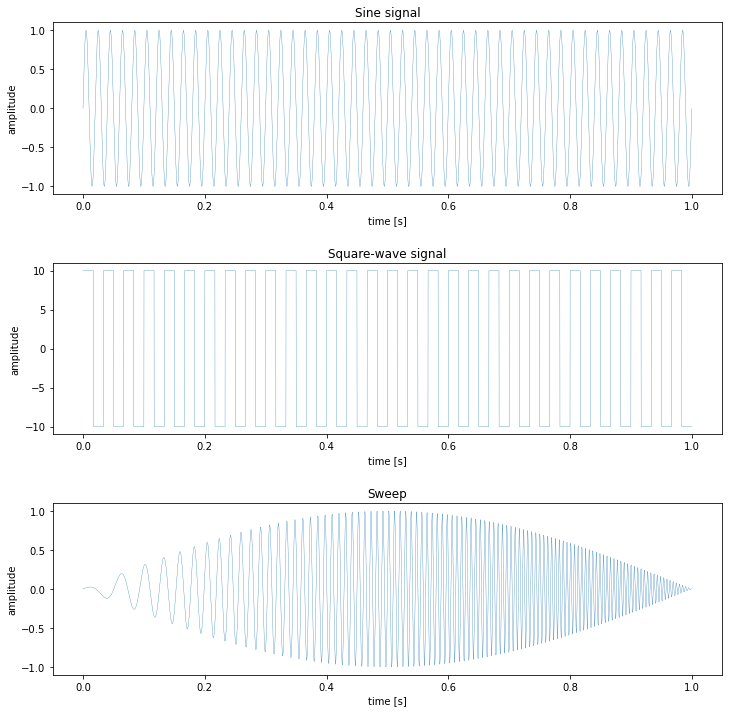

In [12]:
fig, ax = plt.subplots(3,1, figsize = (12,12))
ax[0].plot(t, sgSine, label='simulated sine signal', lw = .3)
ax[0].set_title("Sine signal")
ax[0].set_xlabel('time [s]')
ax[0].set_ylabel('amplitude')

ax[1].plot(t, sgSquare, label='simulated square-wave signal', lw = .3)
ax[1].set_title("Square-wave signal")
ax[1].set_xlabel('time [s]')
ax[1].set_ylabel('amplitude')

ax[2].plot(t, sgSweep, label='simulated sweep signal', lw = .3)
ax[2].set_title("Sweep")
ax[2].set_xlabel('time [s]')
ax[2].set_ylabel('amplitude')

plt.subplots_adjust(hspace=0.4)
plt.show()

### FFT

In [10]:
sin_fft = sp.fftpack.fft(sgSine)
sin_abs_fft = 2 * np.abs(sin_fft)/(len(sgSine))
sin_fftfreq = sp.fftpack.fftfreq(len(sin_abs_fft), 1/sampleRate)

sq_fft = sp.fftpack.fft(sgSquare)
sq_abs_fft = 2 * np.abs(sq_fft)/(len(sgSquare))
sq_fftfreq = sp.fftpack.fftfreq(len(sq_abs_fft), 1/sampleRate)

sweep_fft = sp.fftpack.fft(sgSweep)
sweep_abs_fft = 2 * np.abs(sweep_fft)/(len(sgSweep))
sweep_fftfreq = sp.fftpack.fftfreq(len(sweep_abs_fft), 1/sampleRate)

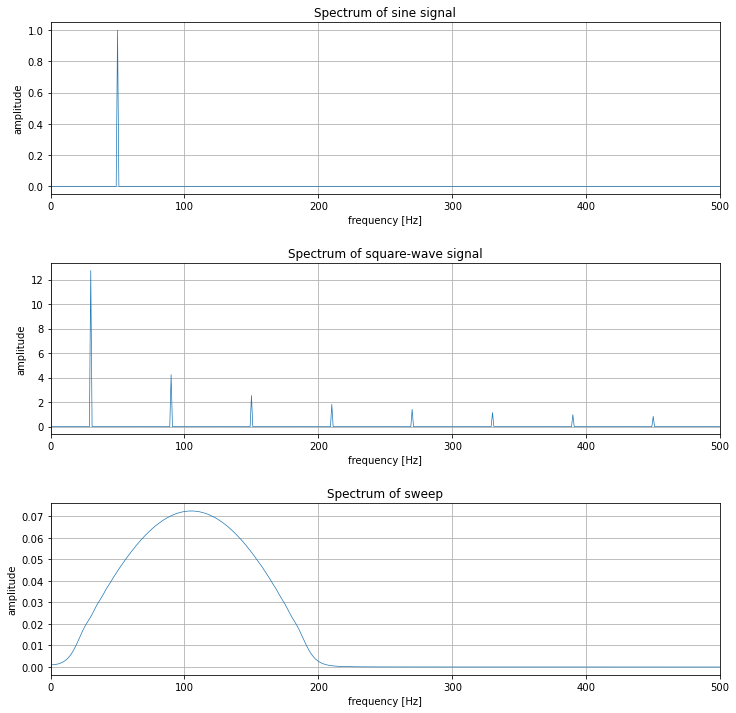

In [11]:
fig, ax = plt.subplots(3,1, figsize = (12,12))
i = sin_fftfreq > 0

ax[0].plot(sin_fftfreq[i], sin_abs_fft[i], lw = .7)
ax[0].set_title("Spectrum of sine signal")
ax[0].set_xlabel('frequency [Hz]')
ax[0].set_ylabel('amplitude')
ax[0].set_xlim(0,500)
ax[0].grid()

ax[1].plot(sq_fftfreq[i], sq_abs_fft[i], lw = .7)
ax[1].set_title("Spectrum of square-wave signal")
ax[1].set_xlabel('frequency [Hz]')
ax[1].set_ylabel('amplitude')
ax[1].set_xlim(0,500)
ax[1].grid()

ax[2].plot(sweep_fftfreq[i], sweep_abs_fft[i], lw = .7)
ax[2].set_title("Spectrum of sweep")
ax[2].set_xlabel('frequency [Hz]')
ax[2].set_ylabel('amplitude')
ax[2].set_xlim(0,500)
ax[2].grid()

plt.subplots_adjust(hspace=0.4)
plt.show()

## A simple sine signal with noise

### Create the signal

In [13]:
sampleRate = sampleRates[5]
endTime = 1   #seconds

frqSine = 20
amplSine = 0.7
amplNoise = 0.3
frqNoiseSine = 50

t = np.linspace(0, endTime, endTime*sampleRate, endpoint = True)
x = np.arange(len(t))
sgSine = amplSine * np.sin(2 * np.pi * frqSine * x/sampleRate)
sgNoise = amplNoise * np.sin(2 * np.pi * frqNoiseSine * x/sampleRate)
#sgNoise = np.random.uniform(0, amplNoise, x.shape)

sgSum = sgSine + sgNoise

### FFT

In [14]:
sin_fft = sp.fftpack.fft(sgSine)
sin_abs_fft = 2 * np.abs(sin_fft)/(len(sgSine))
sin_fftfreq = sp.fftpack.fftfreq(len(sin_abs_fft), 1/sampleRate)

sg_fft = sp.fftpack.fft(sgSum)
sg_abs_fft = 2 * np.abs(sg_fft)/(len(sgSum))
sg_fftfreq = sp.fftpack.fftfreq(len(sg_abs_fft), 1/sampleRate)

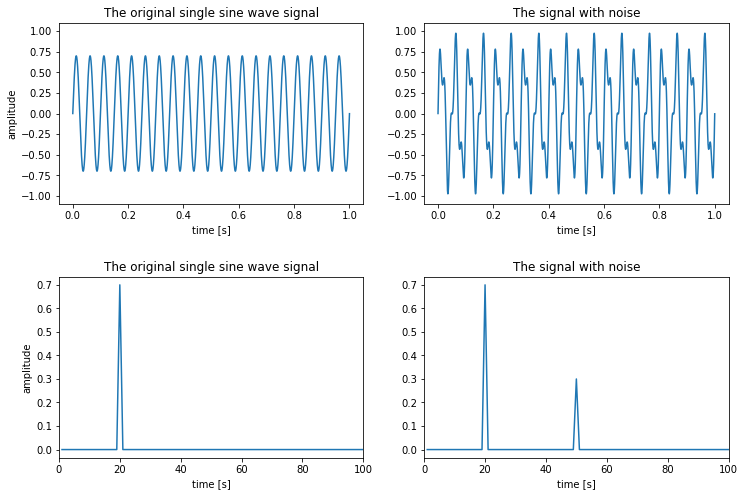

In [15]:
fig = plt.figure(figsize = (12,8))
i = sin_fftfreq > 0
sub1 = fig.add_subplot(2,2,1)
sub1.plot(t, sgSine)
sub1.set_title('The original single sine wave signal')
sub1.set_xlabel('time [s]')
sub1.set_ylabel('amplitude')
sub1.set_ylim(-1.1,1.1)
sub2 = fig.add_subplot(2,2,2)
sub2.plot(t, sgSum)
sub2.set_title('The signal with noise')
sub2.set_xlabel('time [s]')
sub2.set_ylim(-1.1,1.1)
sub3 = fig.add_subplot(2,2,3)
sub3.plot(sin_fftfreq[i], sin_abs_fft[i])
sub3.set_title('The original single sine wave signal')
sub3.set_xlabel('time [s]')
sub3.set_ylabel('amplitude')
sub3.set_xlim(0,100)
sub4 = fig.add_subplot(2,2,4)
sub4.plot(sg_fftfreq[i], sg_abs_fft[i])
sub4.set_title('The signal with noise')
sub4.set_xlabel('time [s]')
sub4.set_xlim(0,100)
plt.subplots_adjust(hspace=0.4)
plt.show()

## Four common frequency filters

Where the filter amplitude is 1, the amplitudes of the signal stay unchanged, where it is 0, the signal's amplitudes become 0.

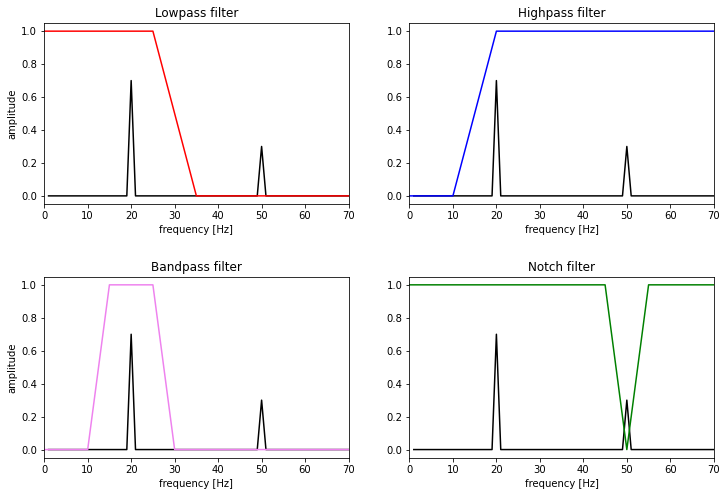

In [16]:
lowpass_demo = [[0, 25, 35, 80], [1, 1, 0, 0]]
highpass_demo = [[0, 10, 20, 80], [0, 0, 1, 1]]
bandpass_demo = [[0, 10, 15, 25, 30, 80], [0, 0, 1, 1, 0, 0]]
notch_demo = [[0, 45, 50, 55, 80], [1, 1, 0, 1, 1]]

fig = plt.figure(figsize = (12,8))
i = sin_fftfreq > 0
sub1 = fig.add_subplot(2,2,1)
sub1.plot(sg_fftfreq[i], sg_abs_fft[i], color = 'black')
sub1.plot(lowpass_demo[0], lowpass_demo[1], color = 'red')
sub1.set_title('Lowpass filter')
sub1.set_xlabel('frequency [Hz]')
sub1.set_ylabel('amplitude')
sub1.set_xlim(0,70)
sub2 = fig.add_subplot(2,2,2)
sub2.plot(sg_fftfreq[i], sg_abs_fft[i], color = 'black')
sub2.plot(highpass_demo[0], highpass_demo[1], color = 'blue')
sub2.set_title('Highpass filter')
sub2.set_xlabel('frequency [Hz]')
sub2.set_xlim(0,70)
sub3 = fig.add_subplot(2,2,3)
sub3.plot(sg_fftfreq[i], sg_abs_fft[i], color = 'black')
sub3.plot(bandpass_demo[0], bandpass_demo[1], color = 'violet')
sub3.set_title('Bandpass filter')
sub3.set_xlabel('frequency [Hz]')
sub3.set_ylabel('amplitude')
sub3.set_xlim(0,70)
sub4 = fig.add_subplot(2,2,4)
sub4.plot(sg_fftfreq[i], sg_abs_fft[i], color = 'black')
sub4.plot(notch_demo[0], notch_demo[1], color = 'green')
sub4.set_title('Notch filter')
sub4.set_xlabel('frequency [Hz]')
sub4.set_xlim(0,70)
plt.subplots_adjust(hspace=0.4)
plt.show()

- The only one we can't use here is the highpass, because it would not mute the noise and keep the signal.
- In this simple example most of the other 3 filters types will give the same perfect result. 

### Lowpass filtering

In [17]:
N = 15
Wn = 40
low = sg.butter(N, Wn, 'lowpass', fs=sampleRate, output='sos') # use a butterworth filter as lowpass
filtered_low = sg.sosfilt(low, sgSum)

### Bandpass filtering

In [18]:
N = 20
Wn = [5,45]
band = sg.butter(N, Wn , 'bandpass', fs=sampleRate, output='sos') # use a butterworth filter as bandpass
filtered_band = sg.sosfilt(band, sgSum)

### Notch filtering

In [19]:
frq_to_filt = 50
Q = 2
b, a = sg.iirnotch(frq_to_filt, Q , fs=sampleRate) # a notch filter
filtered_notch = sg.lfilter(b, a, sgSum)

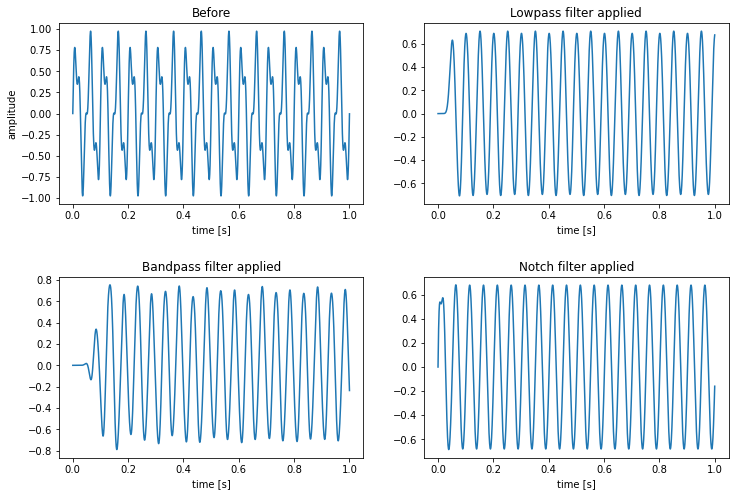

In [20]:
fig = plt.figure(figsize = (12,8))
sub1 = fig.add_subplot(2,2,1)
sub1.plot(t, sgSum)
sub1.set_title('Before')
sub1.set_xlabel('time [s]')
sub1.set_ylabel('amplitude')
sub2 = fig.add_subplot(2,2,2)
sub2.plot(t, filtered_low)
sub2.set_title('Lowpass filter applied')
sub2.set_xlabel('time [s]')
sub3 = fig.add_subplot(2,2,3)
sub3.plot(t, filtered_band)
sub3.set_title('Bandpass filter applied')
sub3.set_xlabel('time [s]')
sub4 = fig.add_subplot(2,2,4)
sub4.plot(t, filtered_notch)
sub4.set_title('Notch filter applied')
sub4.set_xlabel('time [s]')
plt.subplots_adjust(hspace=0.4)
plt.show()

## Cross correlation

- compare two time series and compute where they are most similar

Following situation: You have field measurements from Vibroseis Truck input recorded by geophones. The sweep goes into the underground and is reflected by every underground layer. With depth the signal looses strength and all reflections overlap each other. So when does every reflection start?

In [21]:
endTime = 3 #seconds
t = np.linspace(0, endTime, endTime*sampleRate, endpoint = True)
x = np.arange(len(t))

# original sweep
sgSweep = sg.chirp(t, f0=10, f1=200, t1=endTime, method='linear')
envelope = 1 * np.sin(2 * np.pi * 0.5 * (1/endTime) * x/sampleRate)
sgSweep *= envelope

In [66]:
sgSweep1 = sgSweep * 0.9
sgSweep2 = sgSweep * 0.6
sgSweep3 = sgSweep * 0.4

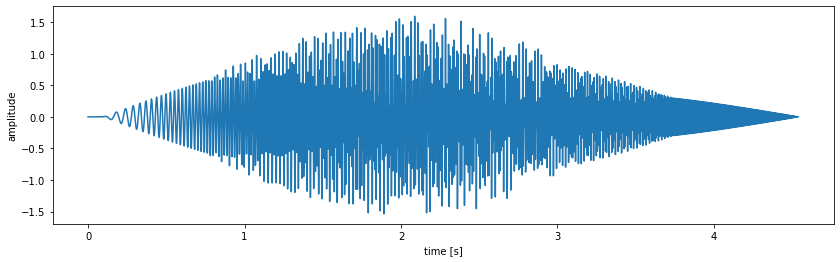

In [67]:
t1 = 0.1
tarr1 = np.linspace(0, t1, int(t1*sampleRate), endpoint = True)
sg1part1 = tarr1 * 0
sg1 = np.concatenate([sg1part1,sgSweep1])

t2 = 0.74
tarr2 = np.linspace(0, t2, int(t2*sampleRate), endpoint = True)
sg2part1 = tarr2 * 0
sg2 = np.concatenate([sg2part1,sgSweep2])

t3 = 1.54
tarr3 = np.linspace(0, t3, int(t3*sampleRate), endpoint = True)
sg3part1 = tarr3 * 0
sg3 = np.concatenate([sg3part1,sgSweep3])

maximum = max(len(sg1),len(sg2),len(sg3))
arr1 = np.zeros(maximum-len(sg1))
arr2 = np.zeros(maximum-len(sg2))
arr3 = np.zeros(maximum-len(sg3))

sg1 = np.concatenate([sg1,arr1])
sg2 = np.concatenate([sg2,arr2])
sg3 = np.concatenate([sg3,arr3])

sgSum = sg1 + sg2 + sg3

plt.figure(figsize=(14,4))
dt = 1/sampleRate
xarr = np.linspace(0,int(len(sgSum))*dt, int(len(sgSum)))
plt.plot(xarr, sgSum)
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()

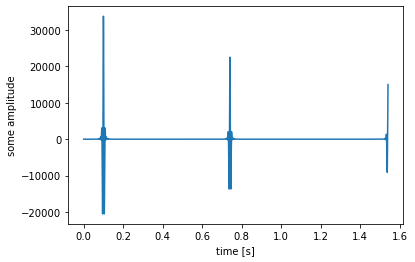

In [69]:
corr = np.correlate(sgSum, sgSweep, "valid")

plt.figure()
tarr = np.linspace(0,int(len(corr))*dt, int(len(corr)))
plt.plot(tarr,corr)
plt.xlabel("time [s]")
plt.ylabel("some amplitude")
plt.show()

The correlation function shows exactly, where a new (reflected) sweep signal begins.